# Palmer Penguins

This notebook contains my analysis of the famous palmer penguins dataset.

## Loading the Dataset

The pandas library in Python has been used for this analysis as it is efficient, powerful, and flexible for analyzing tabular data with ease, leveraging Python's ecosystem (nvidia).

In [43]:
# Data frames
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt 


The penguin csv file used for this analysis was from the [Seaborn](https://github.com/mwaskom/seaborn/blob/master/README.md)'s repository as recommended on the Assessment Instructions for the module of Principles of Data Analytics (in text citation here).

In [33]:
# Load the penguins data set (read_csv_using).
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

## Exploring the Dataset

The structure of the penguins dataset can be understood by looking into it.

In [34]:
# Look into the data structure
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The following assumptions can be made by looking into the structure of this dataset:
<ol>
<li>There are 7 columns with 7 variables.</li>
<li>This dataset is composed by 344 rows.</li>
<li>Some rows of the dataset have NaN.</li> 
</ol>

## Review Dataset Information

To choose the right statistical tests to analyse the dataset, the data types have to be identified for each column of the dataset as well as the count of non-null data (Pandas Python Explore Dataset, Data Variable Types). 

In [35]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


## Types of Variables to Model the Data Set

In the info provided above is shown that 4 of the 7 columns have a data type of float with 64 bits and the other 3 have a datatype identified as object. Object means the value is a string (Pandas Python Explore Dataset).     
Categorical variables (species, island, and sex) are represented as objects in Palmers Penguins DataFrame and should be modeled as objects in Python to maintain their original category. The other variables as bill lenght, bill depth, flipper length and body mass are continuous numerical variables and should be represented as float64 in Python to reflect their decimal values and support the mathematical and statistical calculations such as the mean and  the standard deviations (In text citation for Data Variable Types). 

## Categorical Data and Bar Chart:

To illustrate graphically and better display the comparison of contrast metrics of the data across the different categories the use of bar chart is suggested by Aditya Rana (2023). From the variables in the Palmers penguins dataset, any of the three categorical variable (species, island, and sex) can be appropriate for analysis. According to Enrich et all (1988), birds can demonstrate different characteristics based on their geograpical location. Therefore, for this analysis the location is considered to understand the impact that it has to the characteristics of the penguins. 

To start this analysis the count of each category within the column island is provided below.

In [48]:
# Count the number of penguins of each island
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

Text(0, 0.5, 'Count')

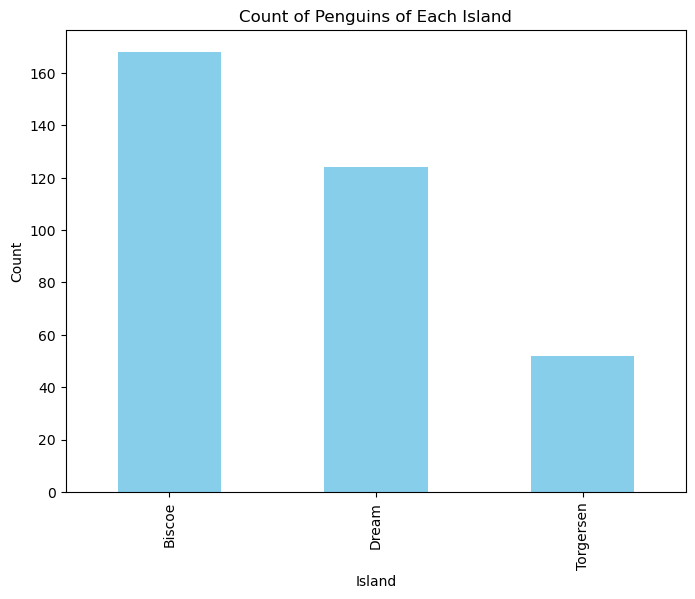

In [50]:
# Name the count of islands
island_count = df['island'].value_counts()
# Set the figure size (width, height)
plt.figure(figsize=(8, 6))
# Plot the bar chart
island_count.plot(kind='bar',color='skyblue')

# Add titles and labels to the bar chart
plt.title('Count of Penguins of Each Island')
plt.xlabel('Island')
plt.ylabel('Count')


In [ ]:
# Count the number of penguins of each sex
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [ ]:
# Count the number of penguins of each species
df['species'].value_counts()

Analysing the different values in the dataset for each of the variables of data type object, these are some of the conclusions:
- Variables species and island have 3 different categories each.
- Variable sex has 2 categories and male being slightly more in counts than female.
- Majority of the penguins in this dataset is from the species Adelia and around 20% only of all counts of penguins are of the species Chainstrap.
- Majority of the penguins are from island Biscoe and just approximately 1 in 7 penguins were identified in island Torgersen.

## Summary Statistics

For the data type float64, descriptive statistics is used to get a summary and initial insights into the data (Calculate Statistics, What is descriptive statistics). 

In [ ]:
# Describe the data set.
[df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The descriptive statistics reveal average measurements (mean) and their variability (standard deviation), highlighting significant diversity among penguins. Most penguins have bill lengths between 39.2 mm and 48.5 mm, bill depths between 15.6 mm and 18.7 mm, flipper lengths between 190.0 mm and 213.0 mm, and body masses ranging from 2,700.0 grams to 6,300.0 grams. Penguins body masses exhibits the highest variation (801.96 grams). These statistics provide key insights into the distribution and typical ranges of these attributes within the dataset.

## Bar Chart and Histrogram



References:

https://www.nvidia.com/en-us/glossary/pandas-python/#:~:text=Benefits%20of%20Pandas&text=Easy%20handling%20of%20missing%20data,DataFrames%20and%20higher%2Ddimensional%20objects 

https://github.com/mwaskom/seaborn/blob/master/README.md

https://ianmcloughlin.github.io/2324_principles_of_data_analytics/

https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/

https://realpython.com/pandas-python-explore-dataset/

https://uniskills.library.curtin.edu.au/numeracy/statistics/data-variable-types/

https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

https://www.simplilearn.com/what-is-descriptive-statistics-article

https://stackoverflow.com/questions/55394854/how-to-change-the-format-of-describe-output

https://venngage.com/blog/bar-charts-vs-histograms/#:~:text=Although%20histograms%20and%20bar%20charts,of%20variables%20in%20a%20dataset

https://web.stanford.edu/group/stanfordbirds/text/essays/Species_and_Speciation.html#:~:text=Geographic%20variation%20%2D%2D%20birds%20showing,natural%20selection%20in%20different%20habitats



***
### End